In [26]:
import sys
import os
import importlib
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime, timedelta

parent_dir = os.path.dirname(os.path.abspath(''))
sys.path.append(parent_dir)

import data_import
importlib.reload(data_import)

TARDIS_TYPE = 'derivative_ticker'
INSTRUMENT = 'btcusdt'
START = '2020-01-01'
END = '2024-10-18'
EXCHANGE = 'binance-futures'

all_data = data_import.normalize_tardis_data(EXCHANGE, TARDIS_TYPE, START, END, INSTRUMENT, parent_dir)

[PROCESSED] 2020-01-01
[PROCESSED] 2020-01-02
[PROCESSED] 2020-01-03
[PROCESSED] 2020-01-04
[PROCESSED] 2020-01-05
[PROCESSED] 2020-01-06
[PROCESSED] 2020-01-07
[PROCESSED] 2020-01-08
[PROCESSED] 2020-01-09
[PROCESSED] 2020-01-10
[PROCESSED] 2020-01-11
[PROCESSED] 2020-01-12
[PROCESSED] 2020-01-13
[PROCESSED] 2020-01-14
[PROCESSED] 2020-01-15
[PROCESSED] 2020-01-16
[PROCESSED] 2020-01-17
[PROCESSED] 2020-01-18
[PROCESSED] 2020-01-19
[PROCESSED] 2020-01-20
[PROCESSED] 2020-01-21
[PROCESSED] 2020-01-22
[PROCESSED] 2020-01-23
[PROCESSED] 2020-01-24
[PROCESSED] 2020-01-25
[PROCESSED] 2020-01-26
[PROCESSED] 2020-01-27
[PROCESSED] 2020-01-28
[PROCESSED] 2020-01-29
[PROCESSED] 2020-01-30
[PROCESSED] 2020-01-31
[PROCESSED] 2020-02-01
[PROCESSED] 2020-02-02
[PROCESSED] 2020-02-03
[PROCESSED] 2020-02-04
[PROCESSED] 2020-02-05
[PROCESSED] 2020-02-06
[PROCESSED] 2020-02-07
[PROCESSED] 2020-02-08
[PROCESSED] 2020-02-09
[PROCESSED] 2020-02-10
[PROCESSED] 2020-02-11
[PROCESSED] 2020-02-12
[PROCESSED]

In [34]:
def data_save(data):
    """
    Save the data to a csv and reinstate the timestamp column.
    """
    df = data.copy()

    data_start = datetime(2020, 1, 1)

    df['timestamp'] = (data_start + (df.index * timedelta(hours=1))).astype('int64')
    df.to_csv("../normalized_datasets/binance_btc_perp.csv", index=False)

data_save(all_data)

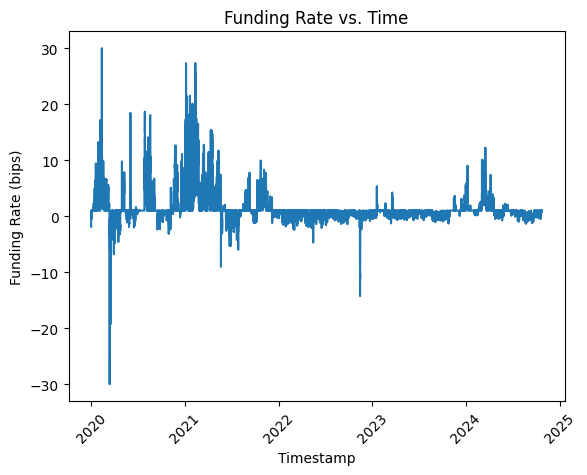

In [37]:
import graph as gp

df = pd.read_csv("../normalized_datasets/binance_btc_perp.csv")
gp.plot_funding_rate(df)